In [5]:
import streamlit as st
import pandas as pd
import base64
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

def load_data(url):
    html=pd.read_html(url, header=0)
    df = html[0]
    return df

In [6]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
df = load_data(url)

In [7]:
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [8]:
sector_unique = df["GICS Sector"].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [12]:
sector = df.groupby('GICS Sector')
sector.first()

,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,MO,Altria Group,reports,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,APA Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,Aflac,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott Laboratories,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M,reports,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products & Chemicals,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [13]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  26.0  1.115660e+06  524383.320718  18926.0  752994.75   
Consumer Discretionary  63.0  8.477582e+05  475172.166505  27419.0  723858.50   
Consumer Staples        32.0  3.872794e+05  564407.571740   7084.0   24213.00   
Energy                  22.0  7.790030e+05  606535.723781   4447.0   95502.00   
Financials              65.0  6.313738e+05  542517.054005   4962.0   64040.00   
Health Care             64.0  8.280406e+05  538555.903001   1800.0  312903.00   
Industrials             74.0  6.859374e+05  592033.294395   4281.0   79229.75   
Information Technology  74.0  8.987211e+05  499064.848336   2488.0  743484.00   
Materials               28.0  8.369064e+05  699182.236462   2969.0   67840.25   
Real Estate             29.0  8.957202e+05  327862.587502  34903.0  783280.00   
Utilities               28.0  8.035041e+05  431315.460314   4904.0  727840.75   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1532807.75  1754301.0  
Consumer Discretionary   920760.0  1164229.50  1590895.0  
Consumer Staples          70615.0   789573.00  1679273.0  
Energy                   940165.0  1144876.75  1701605.0  
Financials               720005.0  1120193.00  1601712.0  
Health Care              880632.0  1100020.50  1821825.0  
Industrials              756468.0  1084970.50  1783180.0  
Information Technology   880565.5  1275848.75  1730168.0  
Materials                915994.5  1419355.00  1755672.0  
Real Estate              920522.0  1053507.00  1393311.0  
Utilities                850906.5  1036121.50  1711269.0

In [14]:
sector.get_group('Health Care')

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
11,A,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
17,ALGN,Align Technology,reports,Health Care,Health Care Supplies,"San Jose, California",2017-06-19,1097149,1997
...,...,...,...,...,...,...,...,...,...
474,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
484,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
488,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [19]:
list(df["Symbol"])[:10]

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES']

In [20]:
# retrieve stock data

data = yf.download(
    tickers=list(df["Symbol"]),

    # valid periods: 1d, 5d, 1mo=default, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max 
    period='ytd', 
    
    # fetch data by interval (including intraday if period < 60)
    # valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
    interval='1d',

    # group by ticker (to accesi via data["SPY"])
    # default=column
    group_by='ticker',

    #adjust all OHLC automatically
    # default=False
    auto_adjust=True,

    # download pre/post regular market hours data
    # default=False
    prepost=True,

    # use threads for mass downloading? (True, False, Integer)
    # default=True
    threads=True,

    # proxy URL scheme use when downloading
    # default=None
    proxy=None
)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [25]:
data['GOOGL']

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,1760.000000,1762.489990,1707.140015,1726.130005,1866200.0
2021-01-05,1725.089966,1746.829956,1716.900024,1740.050049,1018000.0
2021-01-06,1700.260010,1743.969971,1696.099976,1722.880005,2329400.0
2021-01-07,1726.760010,1777.819946,1726.760010,1774.339966,2096800.0
2021-01-08,1777.160034,1799.359985,1761.219971,1797.829956,1774200.0
...,...,...,...,...,...
2021-08-11,2743.629883,2753.649902,2725.429932,2725.580078,76760000.0
2021-08-12,2719.510010,2746.000000,2708.510010,2743.879883,82530000.0
2021-08-13,2745.000000,2757.129883,2740.659912,2754.550049,79700000.0


In [26]:
df = pd.DataFrame(data["ABT"]["Close"])
df["Date"] = df.index
df

,Close,Date
Date,,
2021-01-04,107.864006,2021-01-04
2021-01-05,109.198593,2021-01-05
2021-01-06,108.971214,2021-01-06
2021-01-07,110.028999,2021-01-07
2021-01-08,110.335457,2021-01-08
...,...,...
2021-08-11,121.459999,2021-08-11
2021-08-12,122.809998,2021-08-12
2021-08-13,123.059998,2021-08-13


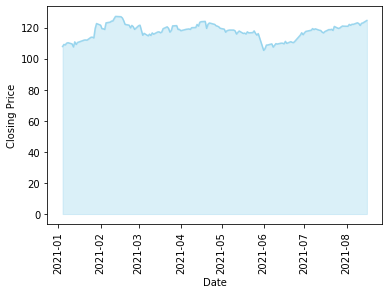

In [29]:
plt.fill_between(df["Date"], df["Close"], color='skyblue', alpha=0.3)
plt.plot(df["Date"], df["Close"], color='skyblue', alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [30]:
def plot_price(symbol):
    df = pd.DataFrame(data[symbol]["Close"])
    df["Date"] = df.index
    
    plt.fill_between(df["Date"], df["Close"], color='skyblue', alpha=0.3)
    plt.plot(df["Date"], df["Close"], color='skyblue', alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()

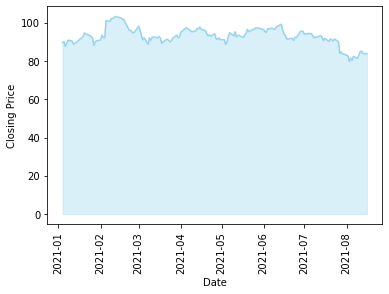

In [38]:
plot_price('ATVI')

In [40]:
loaded = load_data(url)

Dollar Tree


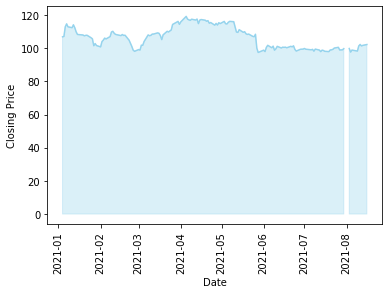

Dominion Energy


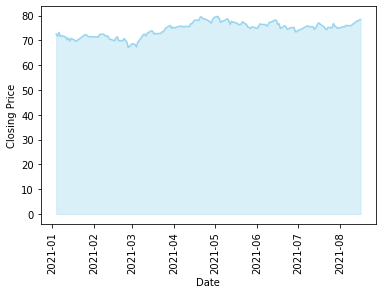

Domino's Pizza


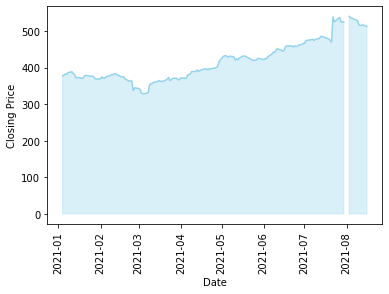

Dover Corporation


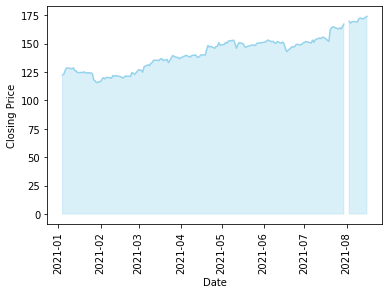

Dow


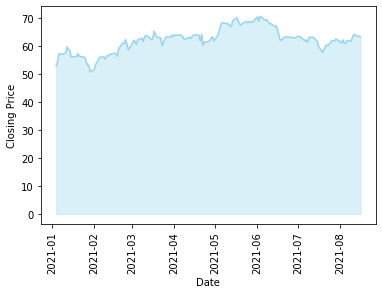

DTE Energy


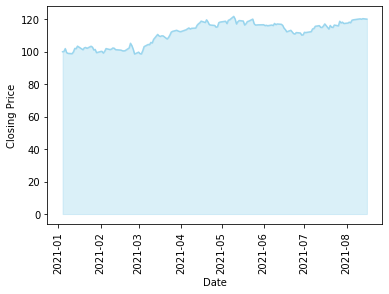

Duke Energy


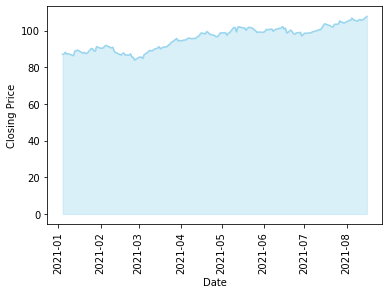

Duke Realty Corp


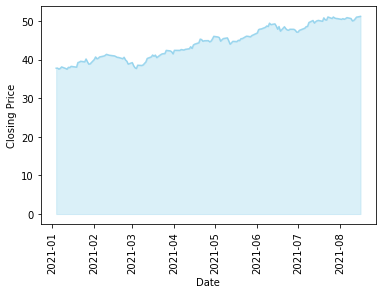

DuPont


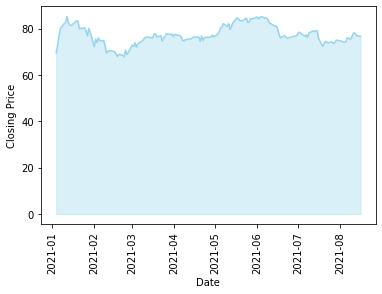

DXC Technology


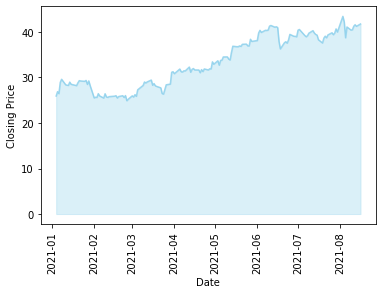

In [47]:
for sym, sec in zip(list(loaded["Symbol"])[150:160], list(loaded["Security"])[150:160]):
    print(sec)
    plot_price(sym)